# 📊 Exploratory Data Analysis (EDA) — Netflix Titles Dataset

**Goal:** Explore the Netflix titles dataset to understand trends in content type, release years, countries, ratings, and genres.

**Dataset:** `netflix_titles.csv`  
**Tools:** Python, Pandas, Matplotlib/Seaborn

---

## ✅ What you will find in this notebook
- Data overview & quality checks (missing values, duplicates)
- Cleaning & feature engineering (year added, duration parsing)
- Visual analysis (content trends, top countries, ratings, genres)
- Key insights summary


## Imports + Settings

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings (simple and readable)
plt.figure(figsize=(8, 4))
sns.set_context("notebook")


<Figure size 800x400 with 0 Axes>

### 1) Load the dataset

We load the CSV file from the `data/` folder and take a quick look at the first rows.


In [4]:
# Load dataset (make sure the file is inside: data/netflix_titles.csv)
df = pd.read_csv("data/netflix_titles.csv")

# Quick preview
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Rows and columns
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types + missing info
df.info()


Shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Missing values per column
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]
print(missing)
# Duplicate rows (if any)
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64
Duplicate rows: 0


In [8]:
df.isna().sum()
# or
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df = df.dropna(subset=['date_added'])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])



In [ ]:
df.isna().sum()
# or
df.isnull().sum()


## 3) Cleaning & feature engineering

We create a few helpful columns:
- `date_added` as a datetime
- `year_added` extracted from `date_added`
- `release_year` is already provided but we can compare trends


In [19]:
# Convert date_added to datetime (errors='coerce' converts invalid values to NaT)
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Extract year_added
df["year_added"] = df["date_added"].dt.year

# Check how many NaT values were created
print("Missing date_added after conversion:", df["date_added"].isna().sum())

df[["date_added", "year_added"]].head()


Missing date_added after conversion: 88


,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


## 4) Movies vs TV Shows

This shows the distribution of content types available in the dataset.


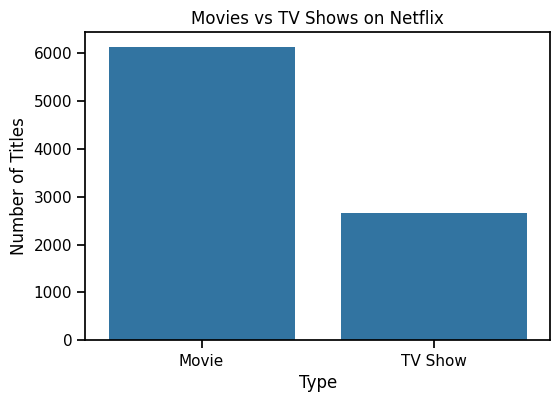

In [20]:
# Count plot for content type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.show()


## 5) Content added over the years

We analyze how many titles were added to Netflix each year (based on `date_added`).


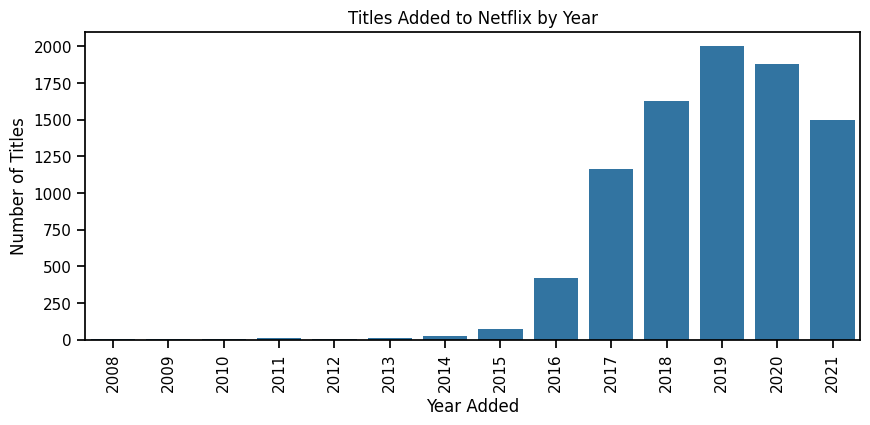

In [21]:
# Drop missing year_added to avoid plotting NaN
df_added = df.dropna(subset=["year_added"]).copy()
df_added["year_added"] = df_added["year_added"].astype(int)

plt.figure(figsize=(10, 4))
sns.countplot(
    data=df_added,
    x="year_added",
    order=sorted(df_added["year_added"].unique())
)
plt.title("Titles Added to Netflix by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=90)
plt.show()


## 6) Top 10 countries by number of titles

The `country` column can contain multiple countries in one cell.  
For a simple first analysis, we use the raw counts.
(We can also split countries later for a more accurate result.)


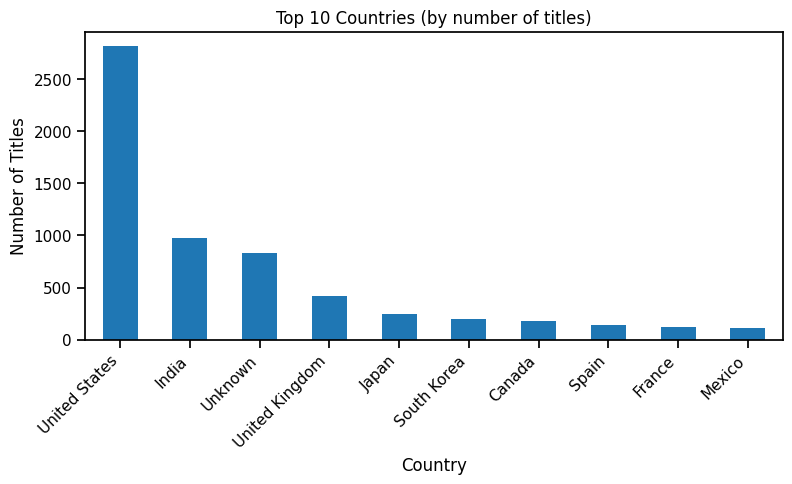

In [22]:
# Top 10 countries (simple approach)
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(9, 4))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries (by number of titles)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.show()


## ✅ Key insights (so far)

- The dataset contains both **Movies** and **TV Shows**, with a visible difference in counts.
- Netflix content additions increased significantly in recent years (based on `date_added`).
- A small number of countries contribute a large portion of the titles in the dataset.

### Next steps
- Clean and split multi-country entries for more accurate country analysis
- Analyze **ratings** distribution (e.g., TV-MA, PG-13)
- Explore **genres** using the `listed_in` column


## 7) Ratings analysis

Ratings indicate the target audience of the content (e.g. TV-MA, PG-13).  
This analysis helps us understand which audience Netflix mainly targets.


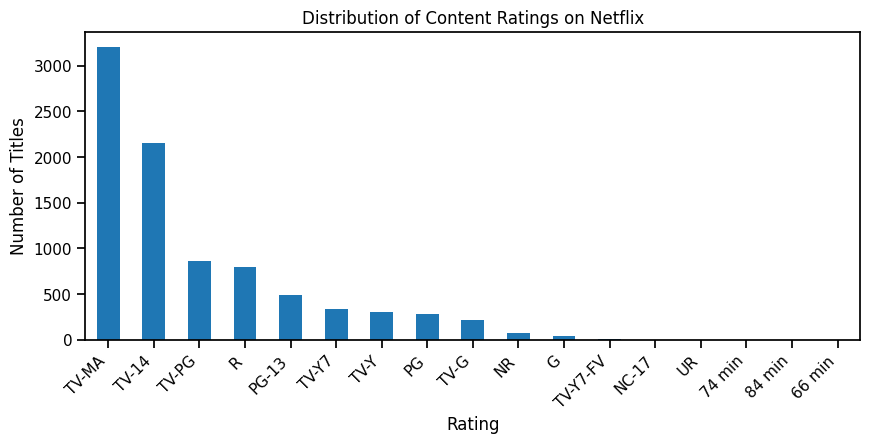

In [24]:
# Count the number of titles per rating
rating_counts = df["rating"].value_counts()

# Plot ratings distribution
plt.figure(figsize=(10, 4))
rating_counts.plot(kind="bar")
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.show()


### 📌 Insight
Most Netflix content is targeted toward **mature audiences**, with ratings such as  
**TV-MA** and **TV-14** dominating the dataset.


## 8) Genre analysis

The `listed_in` column contains multiple genres separated by commas.  
We split these values to analyze the most common genres on Netflix.


In [25]:
# Split genres and explode into separate rows
genres = df["listed_in"].dropna().str.split(", ")

# Convert to long format
genres_exploded = genres.explode()

# Count top 10 genres
top_genres = genres_exploded.value_counts().head(10)

top_genres


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

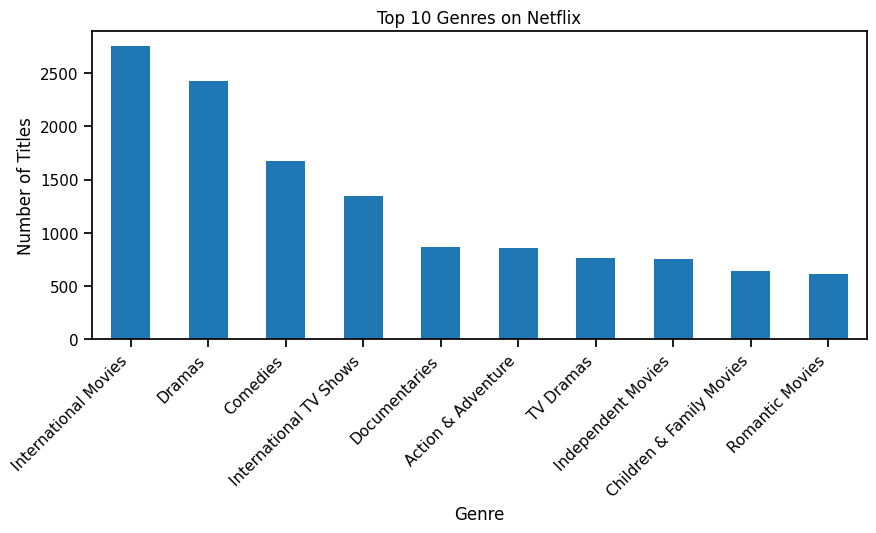

In [26]:
plt.figure(figsize=(10, 4))
top_genres.plot(kind="bar")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.show()


## 🧠 Final insights

- **TV-MA** and **TV-14** are the most common ratings, indicating a strong focus on mature audiences.
- Popular genres include **Dramas**, **International Movies**, and **Comedies**.
- Netflix content is highly diverse but concentrated around a few dominant genres.

### 📈 Conclusion
This exploratory analysis provides a solid understanding of Netflix content trends and
can serve as a foundation for deeper analysis or machine learning models.
